# Mean Reversion Trading Algorithm
* Trading strategy that focuses on when a security moves "too" far away from some kind of average
* General idea is that it will move back toward the mean - at some point
* Many ways to look at this strategy, i.e. linear regression, moving average
* How far is too far? 

In [112]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()
import yfinance as yf

In [113]:
ticker = yf.Ticker("GLD")
gld = ticker.history(period="max")[['Close']]

In [114]:
gld.head()

,Close
Date,
2004-11-18 00:00:00-05:00,44.380001
2004-11-19 00:00:00-05:00,44.779999
2004-11-22 00:00:00-05:00,44.950001
2004-11-23 00:00:00-05:00,44.750000
2004-11-24 00:00:00-05:00,45.049999


In [124]:
ma = 90
gld['returns'] = np.log(gld["Close"]).diff()
gld['ma'] = gld['Close'].rolling(ma).mean()
gld['ratio'] = gld['Close'] / gld['ma']
gld

,Close,returns,ma,ratio,position,strat_return
Date,,,,,,
2004-11-18 00:00:00-05:00,44.380001,NaN,NaN,NaN,NaN,NaN
2004-11-19 00:00:00-05:00,44.779999,0.008973,NaN,NaN,NaN,NaN
2004-11-22 00:00:00-05:00,44.950001,0.003789,NaN,NaN,NaN,NaN
2004-11-23 00:00:00-05:00,44.750000,-0.004459,NaN,NaN,NaN,NaN
2004-11-24 00:00:00-05:00,45.049999,0.006682,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,225.339996,-0.001906,217.349667,1.036763,1.0,-0.001906
2024-08-05 00:00:00-04:00,222.479996,-0.012773,217.581223,1.022515,1.0,-0.012773
2024-08-06 00:00:00-04:00,220.699997,-0.008033,217.776778,1.013423,1.0,-0.008033


In [116]:
gld['ratio'].describe()

count    4874.000000
mean        1.015584
std         0.053518
min         0.814900
25%         0.981276
50%         1.012706
75%         1.049463
max         1.230172
Name: ratio, dtype: float64

In [117]:
percentiles = [5, 20, 50, 80, 95]
p = np.percentile(gld['ratio'].dropna(), percentiles)

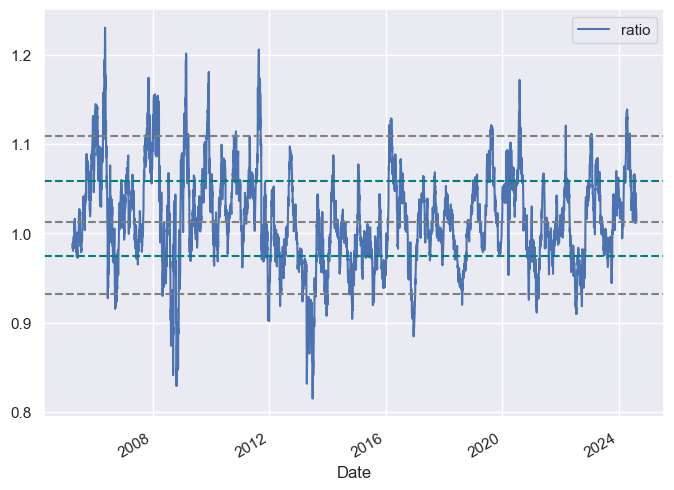

In [118]:
gld['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--')
plt.axhline(p[1], c= (0,.5,.5), ls='--')
plt.axhline(p[-2], c= (0,.5,.5), ls='--');

In [119]:
short = p[-1]
long = p[0]
gld['position'] = np.where(gld.ratio > short, -1, np.nan)
gld['position'] = np.where(gld.ratio < long, 1, gld['position'])
gld['position'] = np.where((gld.ratio >= p[1]) & (gld.ratio <= p[3]), 1, gld['position'])
gld['position'] = gld['position'].ffill()

<Axes: xlabel='Date'>

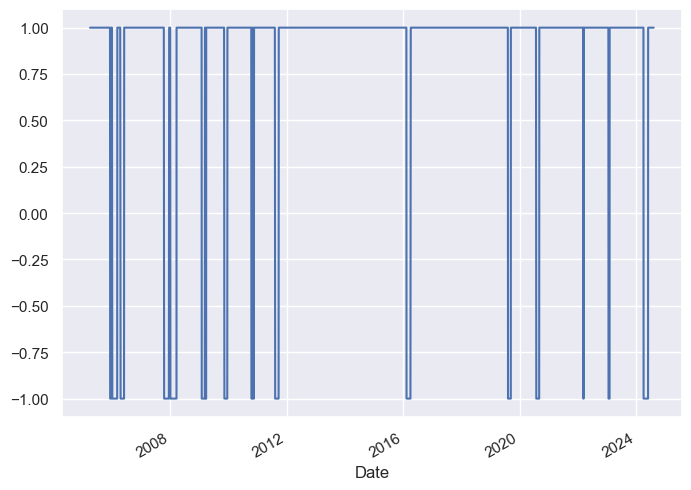

In [120]:
gld.position.dropna().plot()

In [121]:
gld['strat_return'] = gld['returns'] * gld['position'].shift()

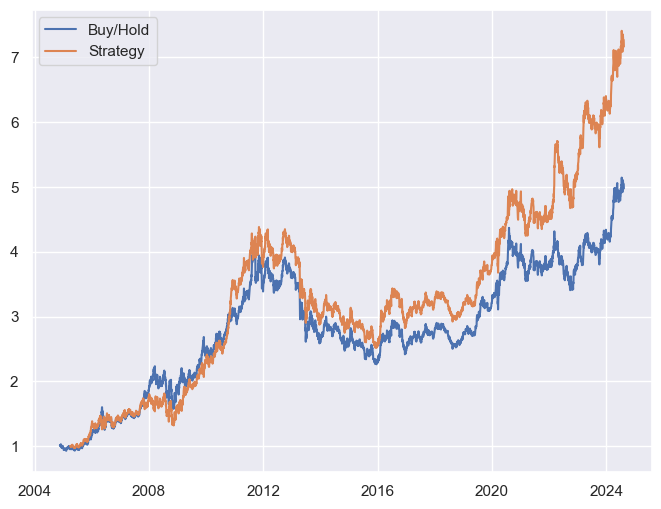

In [122]:
plt.plot(np.exp(gld['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [123]:
print(np.exp(gld['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(gld['strat_return'].dropna()).cumprod()[-1] - 1)

4.047543693453789
6.269816489995804


C:\Users\jsullij9\AppData\Local\Temp\ipykernel_14092\1656860054.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(gld['returns'].dropna()).cumprod()[-1] -1)
C:\Users\jsullij9\AppData\Local\Temp\ipykernel_14092\1656860054.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(gld['strat_return'].dropna()).cumprod()[-1] - 1)
